In [1]:
from parser_java import get_unit_test_files, get_target_files, get_matching_target_files 
from file_metrics import  get_history_files
from plot_utils import plot_lines_test_vs_target_normalise_100, plot_lines_test_vs_target_dates, plot_lines_test_vs_target_numeric, plot_lines_test_vs_target_numeric_side_by_side
from modfied_file import get_modifications_of_files
repo_path = "/mnt/data/apache_repos/maven-resolver"
from constants import list_of_apache_repos

In [3]:
import os
import time

all_test_files = get_unit_test_files(repo_path)
if len(all_test_files) == 0:
    print("No test files found")
    exit(0)

map_files = get_target_files(repo_path, all_test_files)

all_files = [map_['test'] for map_ in map_files] + [map_['target'] for map_ in map_files]
all_files_info = get_modifications_of_files(repo_path, all_files)

map_files_info = []
for map_ in map_files:
    map_files_info.append({
        'test': all_files_info[map_['test']],
        'target': all_files_info[map_['target']]
    })
# append results in table_1.txt
map_before, map_same, map_after = get_history_files(map_files_info)
print(f"repo: {repo_path}")
print("Before: " + str(len(map_before)))
print("Same: " + str(len(map_same)))
print("After: " + str(len(map_after)))



Total number of test files:  160
Total number of target files found:  137
repo: /mnt/data/apache_repos/maven-resolver
Before: 1
Same: 91
After: 45


# Files where test are created before the target file

## Diff of the test file and the target file

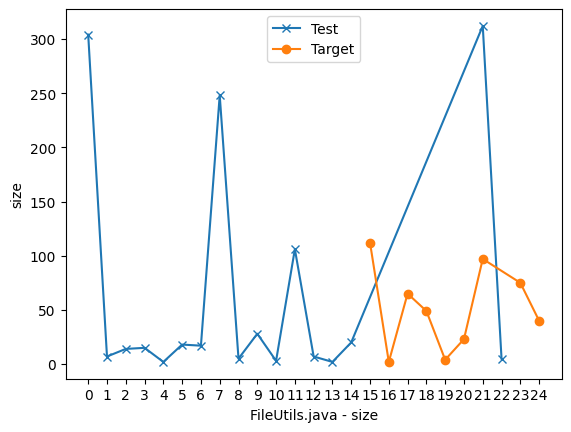

In [5]:
first_before = map_before[0]
plot_lines_test_vs_target_numeric(first_before['test'], first_before['target'], "size")

## Add lines to the test file vs the target file

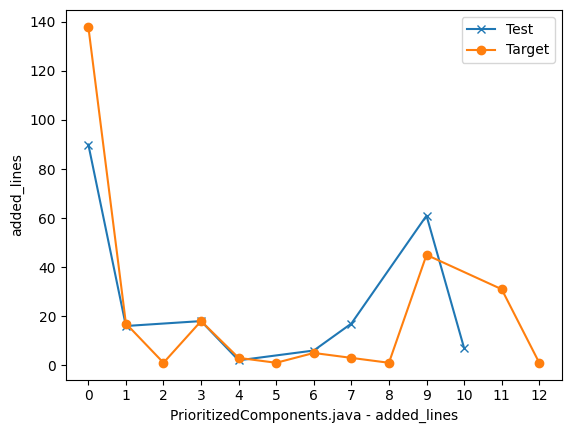

In [ ]:
plot_lines_test_vs_target_numeric(first_before['test'], first_before['target'], "added_lines")


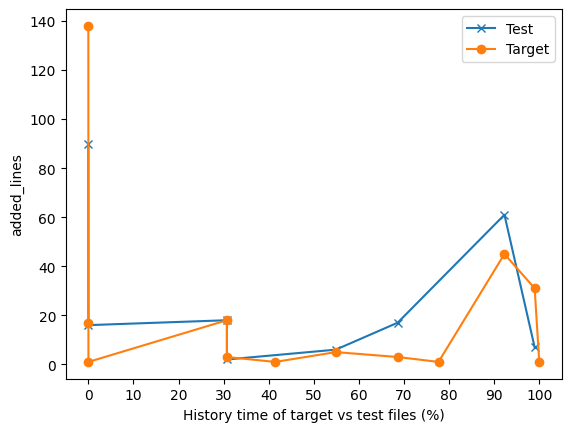

In [ ]:
plot_lines_test_vs_target_normalise_100(first_before['test'], first_before['target'], 'added_lines')

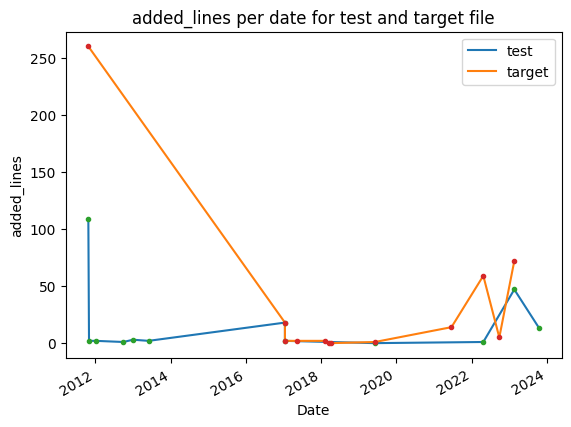

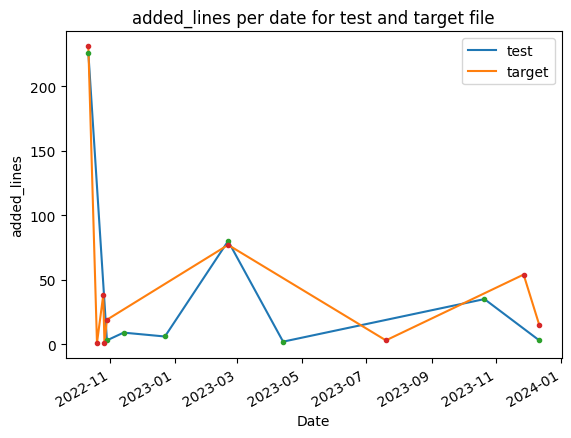

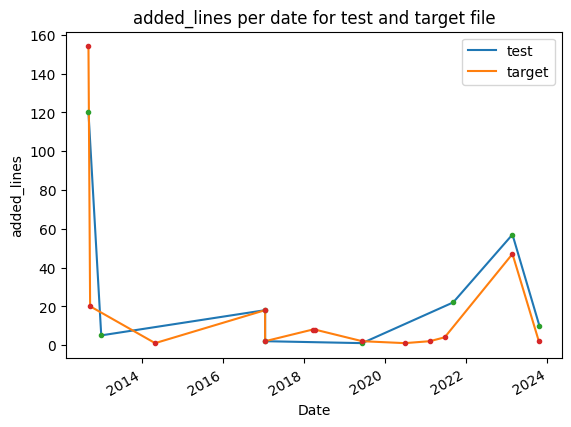

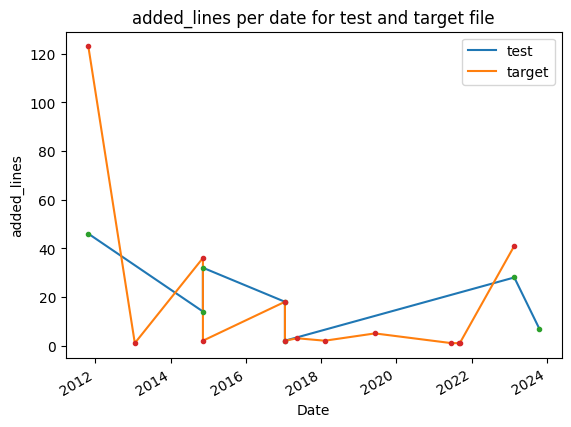

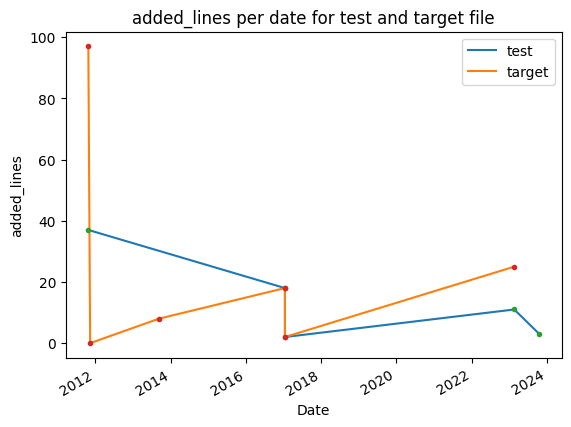

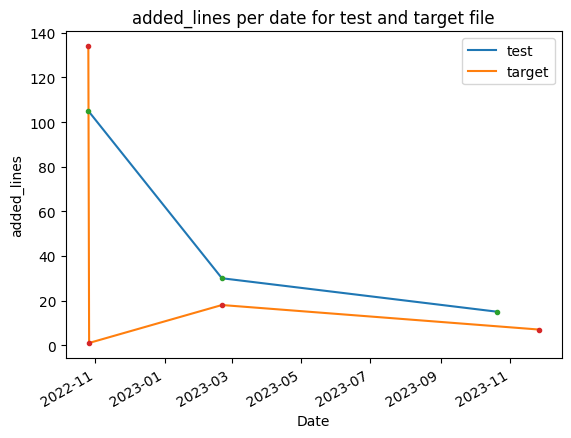

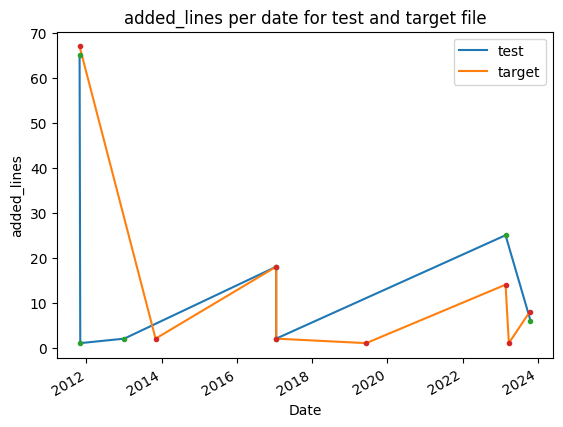

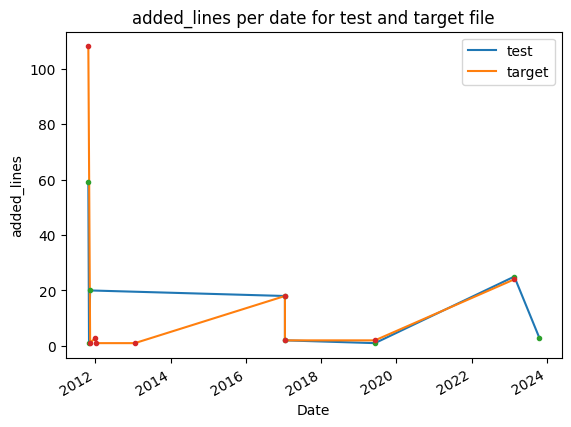

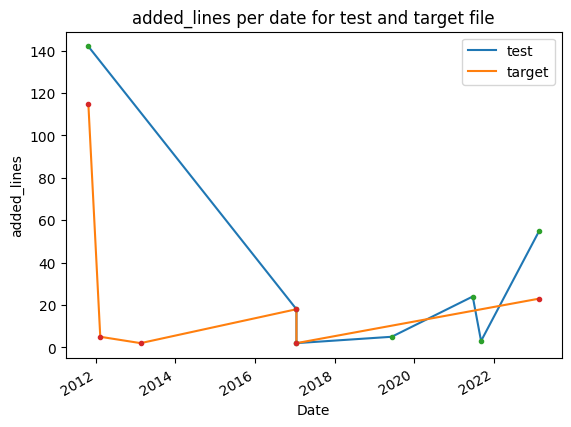

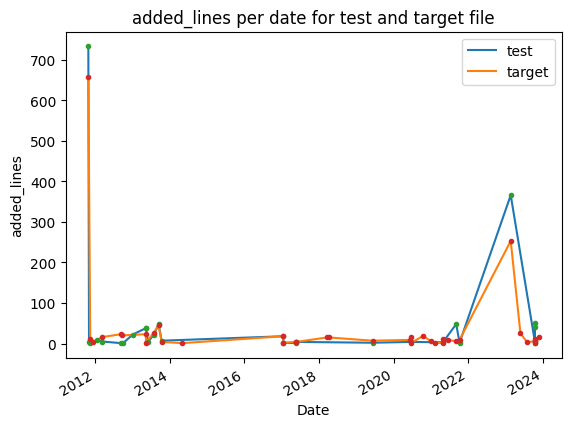

In [11]:
for map_ in map_same[:10]:
    plot_lines_test_vs_target_dates(map_['test'], map_['target'], 'added_lines')